In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib.ticker import FuncFormatter

In [3]:
def thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w):
    α_s = 1 - r_s * (1 - α_m)
    α_i = 1 - r_i * (1 - α_m)
    ψ_w = 1 - w * (1 - ψ)
    γ_p = 1 - p * (1 - γ)
    
    if α == 2:
        mean_a = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a = (1 - α) * (1 - eps**(2 - α)) / ((2 - α) * (1 - eps**(1 - α)))
    
    if α == 3:
        mean_a2 = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a2 = (1 - α) * (1 - eps**(3 - α)) / ((3 - α) * (1 - eps**(1 - α)))
    
    λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)
    return λ_t, mean_a

def two_significant_digits(x, pos):
    return "{:.1f}".format(x)

In [4]:
vi = np.linspace(0, 1, 11)
th_40 = np.zeros(len(vi))
th_80 = np.zeros(len(vi))
for i, v in enumerate(vi):
    th_40[i] = thresh(0.01, 0.001, 2.1, 2, v, 0.4, 0, 0, 0, 0, 0, 0, 0)[0]
    th_80[i] = thresh(0.01, 0.001, 2.1, 2, v, 0.8, 0, 0, 0, 0, 0, 0, 0)[0]

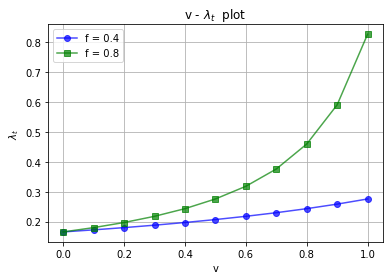

In [19]:
fig, axs = plt.subplots()
axs.plot(vi, th_40, color = "blue", marker = "o", alpha = 0.7, label = "f = 0.4" )
axs.plot(vi, th_80, color = "green", marker = "s", alpha = 0.7, label = "f = 0.8" )
axs.set_xlabel("v")
axs.set_ylabel("$\lambda _t$")
axs.grid(True)
axs.legend()
axs.set_title("v - $\\lambda_t$  plot")
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\v_vs_lambda.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
plt.show()


In [7]:
r_i = np.linspace(0, 1, 11)
th_10_10 = np.zeros(len(vi))
th_10_50 = np.zeros(len(vi))
th_80_10 = np.zeros(len(vi))
th_80_50 = np.zeros(len(vi))
for i, r_is in enumerate(r_i):
    th_10_10[i] = thresh(0.01, 0.001, 2.1, 2, 0, 0, 0.9, 0.1, r_is, 0, 0, 0, 0)[0]
    th_10_50[i] = thresh(0.01, 0.001, 2.1, 2, 0, 0, 0.5, 0.1, r_is, 0, 0, 0, 0)[0]
    th_80_10[i] = thresh(0.01, 0.001, 2.1, 2, 0, 0, 0.9, 0.8, r_is, 0, 0, 0, 0)[0]
    th_80_50[i] = thresh(0.01, 0.001, 2.1, 2, 0, 0, 0.5, 0.8, r_is, 0, 0, 0, 0)[0]

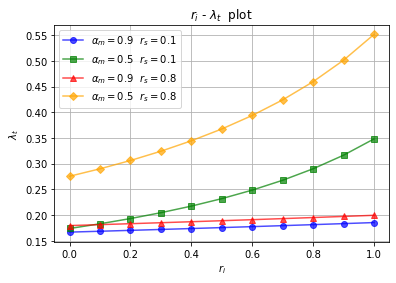

In [20]:
fig, axs = plt.subplots()
axs.plot(r_i, th_10_10, color = "blue", marker = "o", alpha = 0.7, label = "$ \\alpha _m = 0.9 \,\,\,\, r_s = 0.1$" )
axs.plot(r_i, th_10_50, color = "green", marker = "s", alpha = 0.7, label = "$ \\alpha _m = 0.5 \\,\,\,\, r_s = 0.1$" )
axs.plot(r_i, th_80_10, color = "red", marker = "^", alpha = 0.7, label = "$\\alpha _m = 0.9 \\,\,\,\, r_s = 0.8$" )
axs.plot(r_i, th_80_50, color = "orange", marker = "D", alpha = 0.7, label = "$\\alpha _m = 0.5 \\,\,\,\, r_s = 0.8$" )
axs.set_xlabel("$r_i$")
axs.set_ylabel("$\\lambda _t$")
axs.grid(True)
axs.legend()
axs.set_title("$r_i$ - $\\lambda_t$  plot")
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ri_vs_lambda.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

plt.show()

In [9]:
a_m = np.linspace(0, 1, 11)
tha_10_10 = np.zeros(len(a_m))
tha_10_80 = np.zeros(len(a_m))
tha_80_80 = np.zeros(len(a_m))

for i, a_ms in enumerate(a_m):
    tha_10_10[i] = thresh(0.01, 0.001, 2.1, 2, 0, 0, a_ms, 0.1, 0.1, 0, 0, 0, 0)[0]
    tha_10_80[i] = thresh(0.01, 0.001, 2.1, 2, 0, 0, a_ms, 0.1, 0.8, 0, 0, 0, 0)[0]
    tha_80_80[i] = thresh(0.01, 0.001, 2.1, 2, 0, 0, a_ms, 0.8, 0.8, 0, 0, 0, 0)[0]

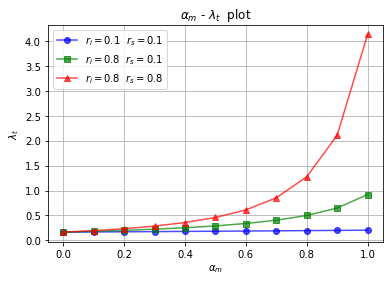

In [21]:
fig, axs = plt.subplots()
axs.plot(1.-a_m, tha_10_10, color = "blue", marker = "o", alpha = 0.7, label = "$ r_i = 0.1 \,\,\,\, r_s = 0.1$" )
axs.plot(1-a_m, tha_10_80, color = "green", marker = "s", alpha = 0.7, label = "$ r_i = 0.8 \,\,\,\, r_s = 0.1$" )
axs.plot(1-a_m, tha_80_80, color = "red", marker = "^", alpha = 0.7, label = "$r_i = 0.8 \\,\,\,\, r_s = 0.8$" )

axs.set_xlabel("$\\alpha _m$")
axs.set_ylabel("$\\lambda _t$")
axs.grid(True)
axs.legend()
axs.set_title("$\\alpha_m$ - $\\lambda_t$  plot")
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\alpham_vs_lambda.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

plt.show()